In [13]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from collisions import collide_oo, collide_ow
from typing import List, Tuple, Union
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
np.random.seed(42)  # Set a random seed for reproducibility

In [17]:
def sort_vertices_ccw(coords):
    # Find the centroid of the polygon
    x = [c[0] for c in coords]
    y = [c[1] for c in coords]
    cx = sum(x) / len(coords)
    cy = sum(y) / len(coords)

    # Calculate the angle between each vertex and the centroid
    angles = []
    for i in range(len(coords)):
        x_diff = coords[i][0] - cx
        y_diff = coords[i][1] - cy
        angle = math.atan2(y_diff, x_diff)
        angles.append(angle)

    # Sort the vertices by their angles
    sorted_vertices = [v for _, v in sorted(zip(angles, coords))]

    return sorted_vertices

def generate_right_triangle(BB_MAX: float, side_length: float) -> List[Tuple[float, float]]:
    """Generate a right triangle with a given side length and a random position and rotation within the bounding box."""
    angle = np.random.uniform(0, 2 * np.pi)
    rotation_matrix = jnp.array([[jnp.cos(angle), -jnp.sin(angle)], [jnp.sin(angle), jnp.cos(angle)]])

    # Define a right triangle with vertices at (0, 0), (side_length, 0), and (0, side_length)
    triangle_vertices = jnp.array([[0, 0], [side_length, 0], [0, side_length]])

    # Rotate and translate the triangle
    rotated_vertices = jnp.dot(rotation_matrix, triangle_vertices.T).T
    translation = jnp.array([np.random.uniform(-BB_MAX + side_length, BB_MAX - side_length),
                              np.random.uniform(-BB_MAX + side_length, BB_MAX - side_length)])
    translated_vertices = rotated_vertices + translation
    
    sorted_vertices = sort_vertices_ccw(translated_vertices)

    return sorted_vertices

def triangle_collision_test(bbp=0.1):
    '''
    Tests the functions in collisions.py by plotting two random triangles 
    in the bounding box and checking for collisions.
    '''
    # Generate random triangle vertices within the bounding box
    
    BB_MAX = 1
    BB_MAXp = BB_MAX + bbp
    side_length = 0.5
    triangle1_vertices = generate_right_triangle(BB_MAXp, side_length)
    triangle2_vertices = generate_right_triangle(BB_MAXp, side_length)

    # Plot the triangles and the bounding box
    fig, ax = plt.subplots()
    ax.set_xlim(-BB_MAX - 0.1, BB_MAX + 0.1)
    ax.set_ylim(-BB_MAX - 0.1, BB_MAX + 0.1)
    ax.plot([-BB_MAX, BB_MAX, BB_MAX, -BB_MAX, -BB_MAX], [-BB_MAX, -BB_MAX, BB_MAX, BB_MAX, -BB_MAX], 'k--', label="Bounding Box")
    ax.plot(*zip(*triangle1_vertices, triangle1_vertices[0]), 'r-', label="Triangle 1")
    ax.plot(*zip(*triangle2_vertices, triangle2_vertices[0]), 'b-', label="Triangle 2")
    ax.legend()
    # set the aspect ratio to square
    ax.set_aspect('equal')
    plt.show()

    # Test the collide_oo function
    collide_result, mpvs = collide_oo(triangle1_vertices, triangle2_vertices)
    print(f"Collide_oo result: {collide_result}, MPVs: {mpvs}")

    if collide_result:
        # If the triangles collide, translate each triangle by its respective antiparallel MPV
        triangle1_vertices_mpv = jnp.array(triangle1_vertices) + mpvs[0]
        triangle2_vertices_mpv = jnp.array(triangle2_vertices) + mpvs[1]
        # Plot the triangles and the bounding box after applying the antiparallel MPVs
        fig, ax = plt.subplots()
        ax.set_xlim(-BB_MAX - 0.1, BB_MAX + 0.1)
        ax.set_ylim(-BB_MAX - 0.1, BB_MAX + 0.1)
        ax.plot([-BB_MAX, BB_MAX, BB_MAX, -BB_MAX, -BB_MAX], [-BB_MAX, -BB_MAX, BB_MAX, BB_MAX, -BB_MAX], 'k--', label="Bounding Box")
        ax.plot(*zip(*triangle1_vertices_mpv, triangle1_vertices_mpv[0]), 'r-', label="Triangle 1 (MPV1 applied)")
        ax.plot(*zip(*triangle2_vertices_mpv, triangle2_vertices_mpv[0]), 'b-', label="Triangle 2 (MPV2 applied)")
        # set the aspect ratio to square
        ax.set_aspect('equal')
        ax.legend()
        plt.show()

    

    # Test the collide_ow function for both triangles
    collide_result1, push_vector1 = collide_ow(triangle1_vertices, BB_MAX)
    print(f"Collide_ow for Triangle 1: {collide_result1}, Push Vector: {push_vector1}")

    collide_result2, push_vector2 = collide_ow(triangle2_vertices, BB_MAX)
    print(f"Collide_ow for Triangle 2: {collide_result2}, Push Vector: {push_vector2}")


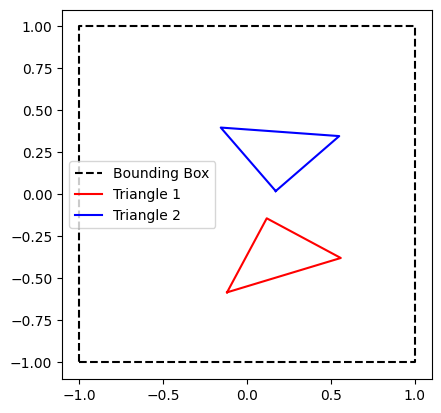

Collide_oo result: False, MPVs: None
Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


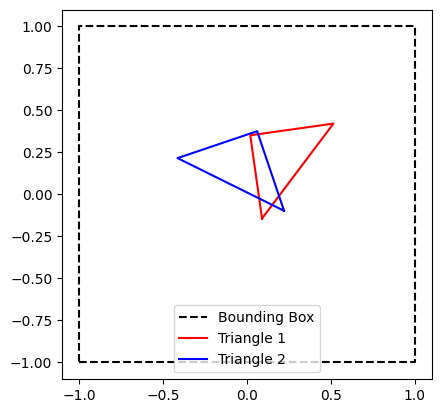

Collide_oo result: True, MPVs: (Array([0.06743895, 0.00951949], dtype=float32), Array([-0.06743895, -0.00951949], dtype=float32))


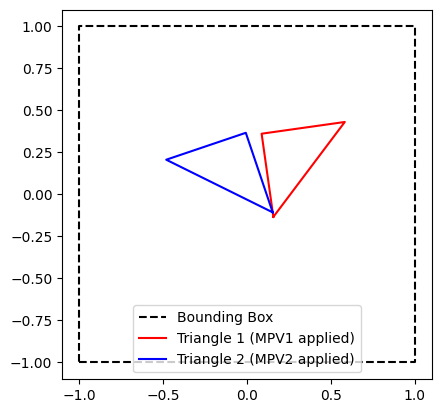

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


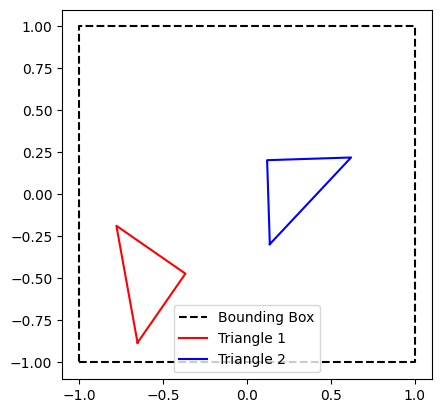

Collide_oo result: False, MPVs: None
Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


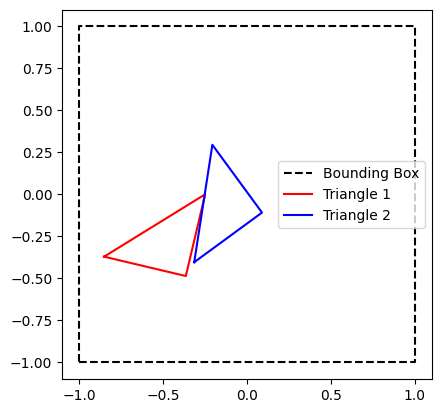

Collide_oo result: True, MPVs: (Array([-0.01276335,  0.00302487], dtype=float32), Array([ 0.01276335, -0.00302487], dtype=float32))


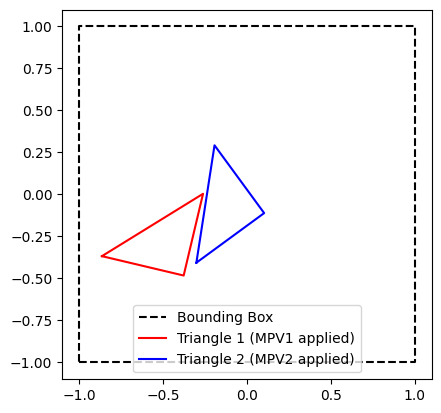

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


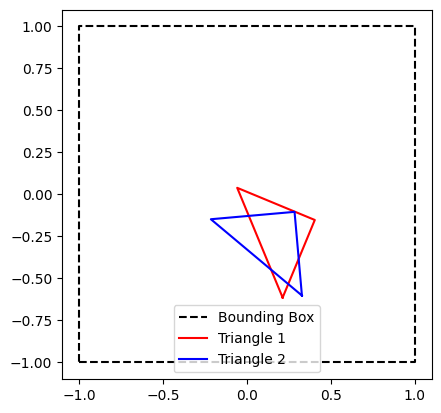

Collide_oo result: True, MPVs: (Array([0.1204287 , 0.04986096], dtype=float32), Array([-0.1204287 , -0.04986096], dtype=float32))


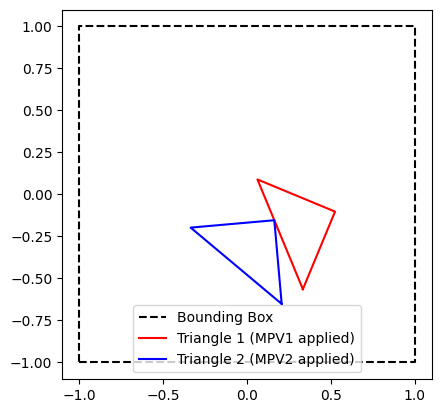

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


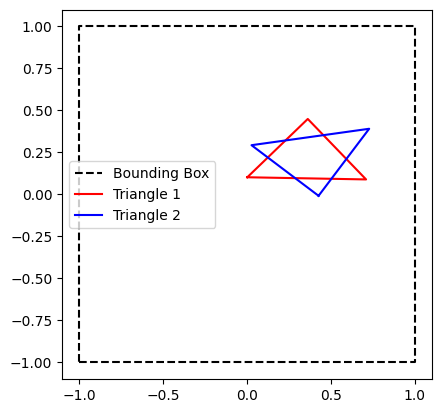

Collide_oo result: True, MPVs: (Array([0.00276284, 0.1509174 ], dtype=float32), Array([-0.00276284, -0.1509174 ], dtype=float32))


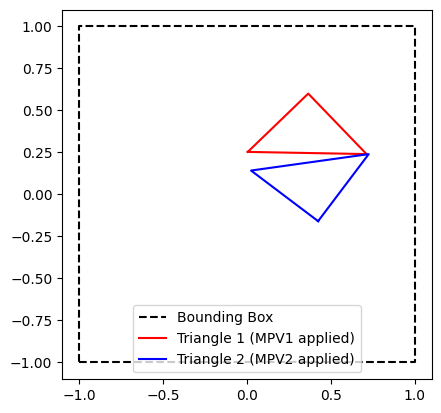

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


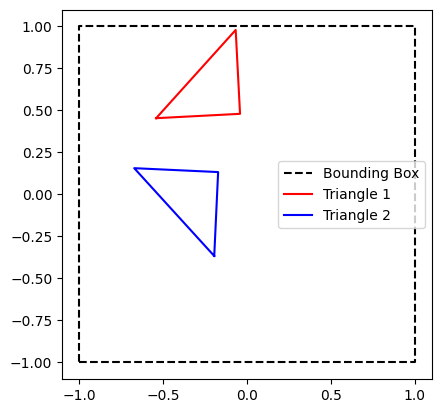

Collide_oo result: False, MPVs: None
Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


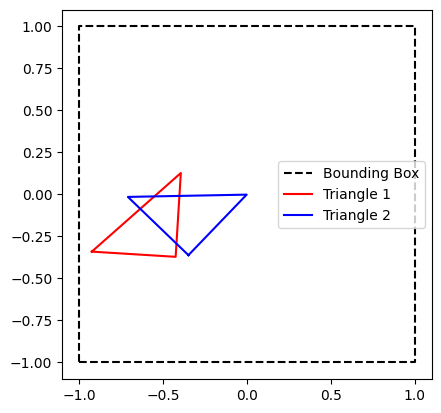

Collide_oo result: True, MPVs: (Array([-0.15257719,  0.0094592 ], dtype=float32), Array([ 0.15257719, -0.0094592 ], dtype=float32))


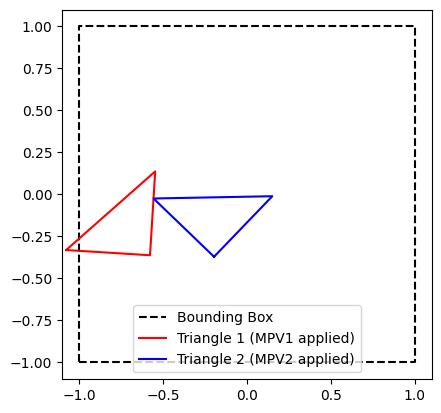

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


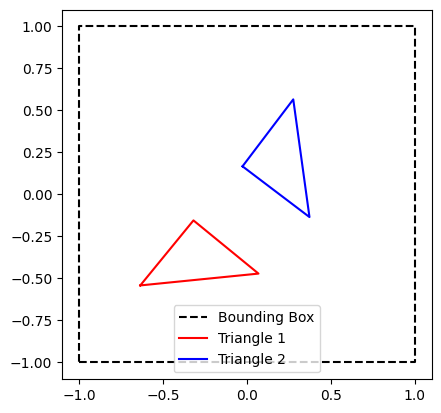

Collide_oo result: False, MPVs: None
Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


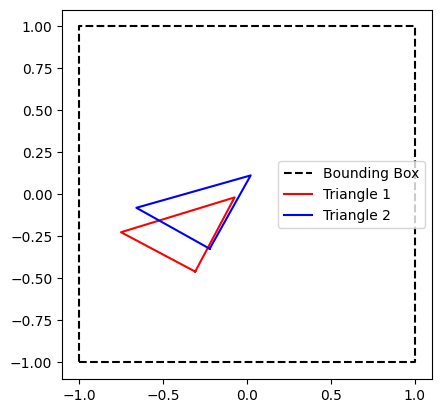

Collide_oo result: True, MPVs: (Array([ 0.0364246, -0.1188786], dtype=float32), Array([-0.0364246,  0.1188786], dtype=float32))


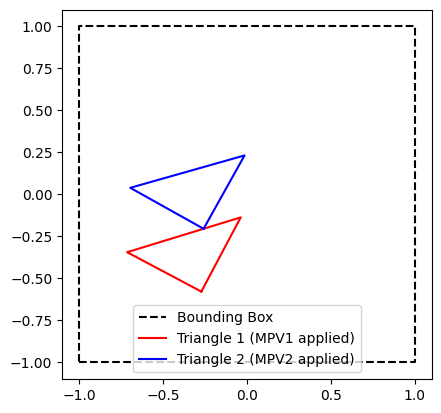

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


In [27]:
for _ in range(10):
    triangle_collision_test(0)